First 5 rows of the dataset:
    Open   High     Low  Close  Adjusted Close   Volume  Dividend Amount  \
0  92.00  93.22  91.830  93.19           93.19  1639613              0.0   
1  93.59  93.96  92.730  93.53           93.53  1183819              0.0   
2  94.00  95.36  93.830  94.68           94.68  1061820              0.0   
3  94.58  94.59  93.245  93.93           93.93  1090277              0.0   
4  94.14  95.81  94.000  95.12           95.12  1106992              0.0   

   Split Coefficient  Daily_Change_In_Price    MA_5  ...  Ticker_ORCL  \
0                1.0               0.019584  88.806  ...        False   
1                1.0               0.003648  89.916  ...        False   
2                1.0               0.012296  91.174  ...        False   
3                1.0              -0.007921  92.600  ...        False   
4                1.0               0.012669  93.346  ...        False   

   Ticker_PYPL  Ticker_QCOM  Ticker_SNE  Ticker_TEL  Ticker_V  Ticker_WDC  

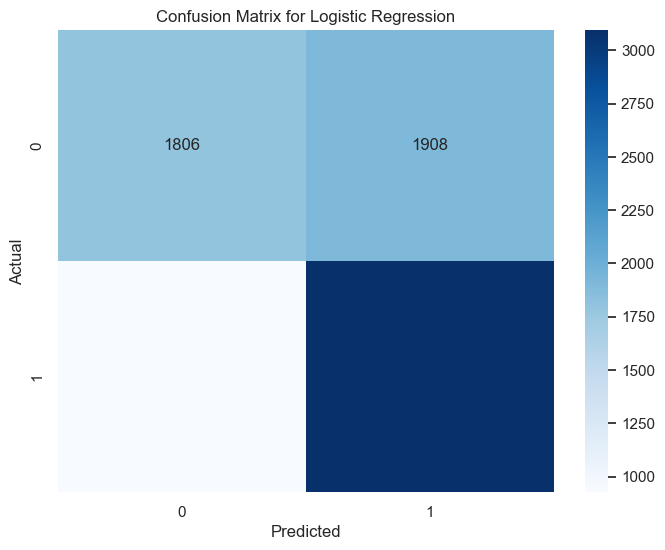


Training Random Forest...
Random Forest Performance:
Accuracy : 0.5498
Precision: 0.5670
Recall   : 0.5670
F1 Score : 0.5670


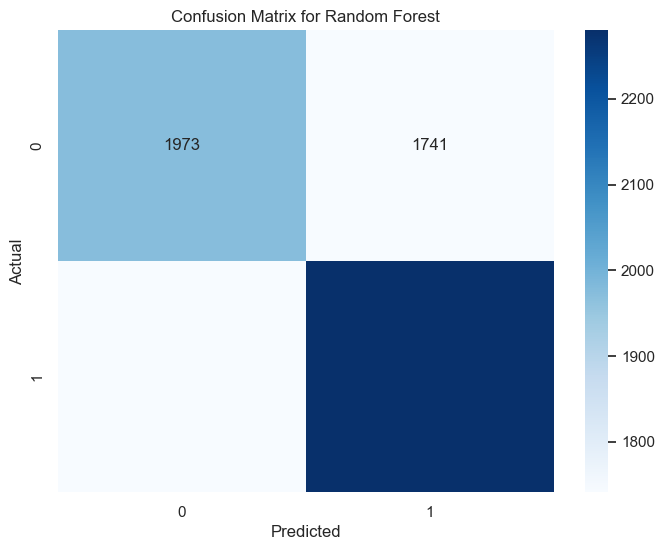


Training K-Nearest Neighbors...
K-Nearest Neighbors Performance:
Accuracy : 0.5076
Precision: 0.5261
Recall   : 0.5317
F1 Score : 0.5289


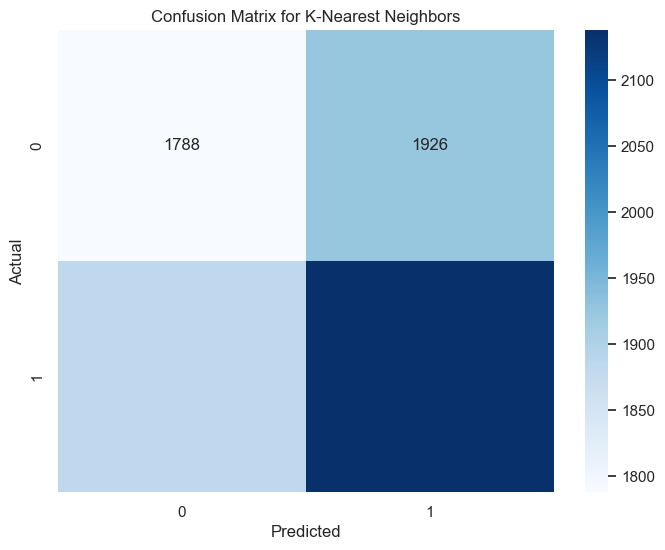


Training Support Vector Machine...
Support Vector Machine Performance:
Accuracy : 0.5134
Precision: 0.5238
Recall   : 0.7041
F1 Score : 0.6007


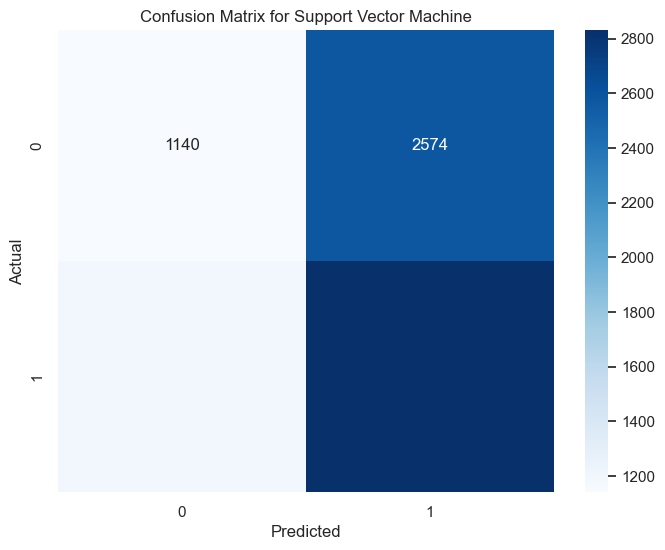


Model Performance Summary:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.633484   0.618553  0.769460  0.685803
Random Forest           0.549838   0.567023  0.567023  0.567023
K-Nearest Neighbors     0.507563   0.526083  0.531709  0.528881
Support Vector Machine  0.513381   0.523774  0.704054  0.600679


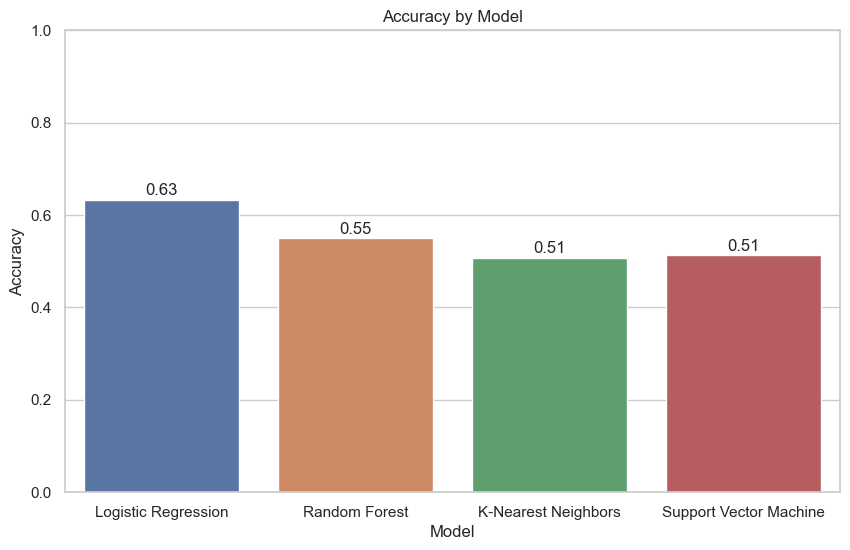

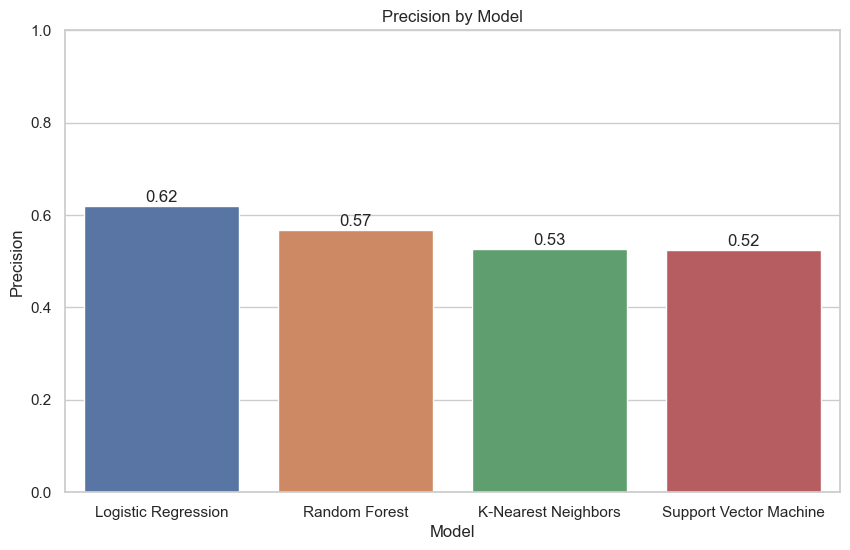

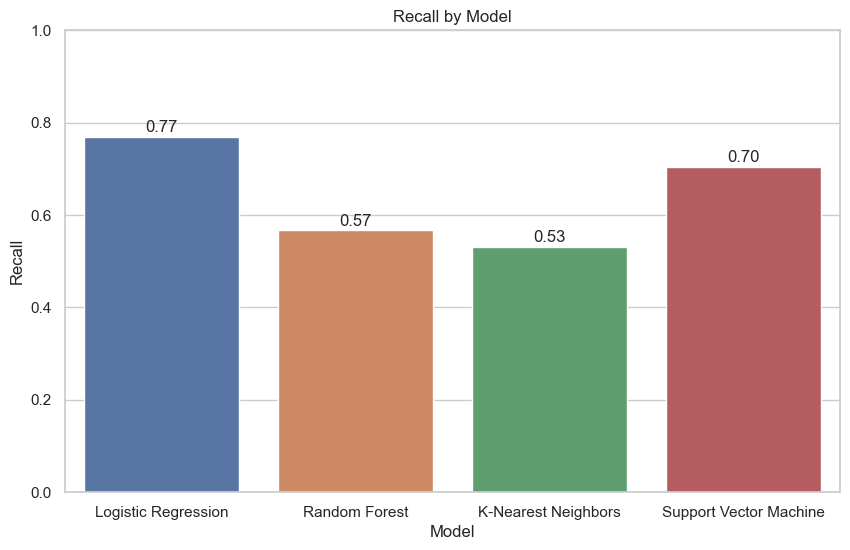

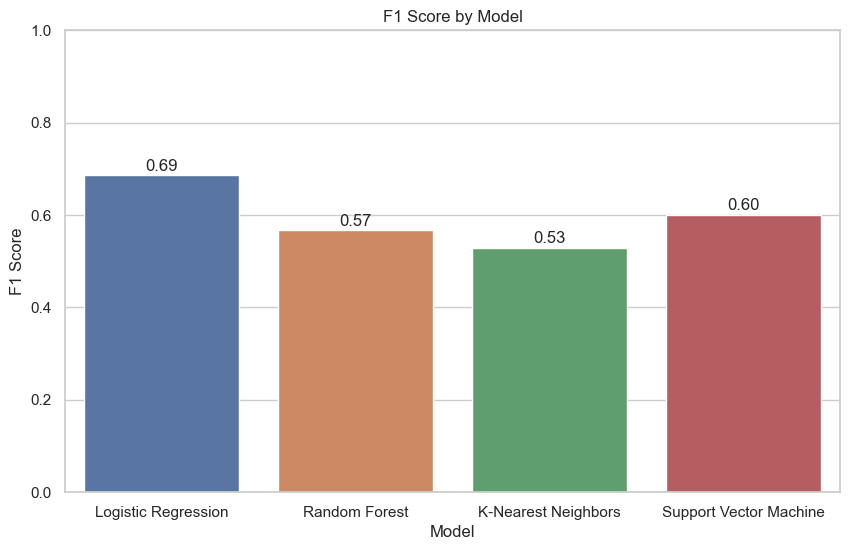

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set plot styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)

# 1. Load the dataset
file_path = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_REFACTORED_CHATGPT_SEP_4.csv'
data = pd.read_csv(file_path)

# Display the first few rows to verify
print("First 5 rows of the dataset:")
print(data.head())

# 2. Preprocess the data

# Define the target variable
# Assuming 'Daily_Change_In_Price' is continuous; converting it to binary
# You can adjust the threshold as needed
data['Target'] = (data['Daily_Change_In_Price'] > 0).astype(int)

# Drop unnecessary columns
columns_to_drop = [
    'Daily_Change_In_Price', 'Close', 'Adjusted Close', 'Volume',
    'Dividend Amount', 'Split Coefficient'
]
X = data.drop(columns=columns_to_drop + ['Target'])
y = data['Target']

# Optional: If 'Ticker_ORCL', 'Ticker_PYPL', etc., are categorical, consider encoding them
# For simplicity, assuming they are already in binary format (True/False)
# If not, you may need to convert them to integers
# Example:
# ticker_columns = ['Ticker_ORCL', 'Ticker_PYPL', 'Ticker_QCOM', 'Ticker_SNE', 'Ticker_TEL', 'Ticker_V', 'Ticker_WDC']
# X[ticker_columns] = X[ticker_columns].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("\nTraining and testing data split completed.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed.")

# 3. Define the ML models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# 4. Train, evaluate, and plot confusion matrices
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Store the results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    # Print the metrics
    print(f"{name} Performance:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 5. Summarize the results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)

# Optional: Save the performance summary to a CSV file
# results_df.to_csv('model_performance_summary.csv')

# Optional: Visualize the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'{metric} by Model')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1)
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value + 0.01, f"{value:.2f}", ha='center')
    plt.show()
